# 설치 부분

In [2]:
!pip install pandas
!pip install matplotlib

# 현재 존재하는 파일 정리

### 여행지 데이터 정리
- 국립공원 : 5개
- 귀산촌 : 5개
- 둘레길 : 7개
- 등산로 : 7개
- 자전거코스 : 6개
> 여행지 데이터의 개수가 불균형하므로 공통적으로 있는 파일을 조사해야함

### 모든 여행지가 공통적으로 있는 파일
- 관심사관심분야(포털 검색 분야) 정보
- 라이프스타일(온라인쇼핑몰 이용 카테고리 정보)
- 관심인구 정보

### 조건
- Age Group : 2만 가져오기
- 먼저 인원 수에 대한 비교 진행

In [77]:
import os


#현재 폴더 경로; 작업 폴더 기준
print(os.getcwd())
def get_file_names(folder_path):
    file_names = os.listdir(folder_path)
    return file_names

folder_path = './data'
file_names = get_file_names(folder_path)
file_names.sort()

for file_name in file_names:
    print(file_name)

C:\Users\engineer\Desktop\24-1 hackerthon
TB_KFS_FFNSR_AGGRP_C.csv
TB_KFS_FFNSR_AR_C.csv
TB_KFS_FFNSR_RSPT_ANS_L1.csv
TB_KFS_FFNSR_RSPT_ANS_L2.csv
TB_KFS_FFNSR_RSPT_DST_D.csv
TB_KFS_FFNSR_RSPT_M.csv
TB_KFS_FFNSR_RSPT_QST_C.csv
국립공원 관심인구 관심사관심분야(포털 검색 분야) 정보.csv
국립공원 관심인구 라이프스타일(온라인쇼핑몰 이용 카테고리 정보).csv
국립공원 관심인구 정보.csv
귀산촌 관심인구 관심사관심분야(포털 검색 분야) 정보.csv
귀산촌 관심인구 라이프스타일(온라인쇼핑몰 검색구매 카테고리) 정보.csv
귀산촌 관심인구 정보.csv
둘레길 관심인구 관심사관심분야(포털 검색 분야) 정보.csv
둘레길 관심인구 라이프스타일(온라인쇼핑몰 이용 카테고리 정보).csv
둘레길 관심인구 정보.csv
등산로 관심인구 관심사관심분야(포털 검색 분야) 정보.csv
등산로 관심인구 라이프스타일(온라인쇼핑몰 이용 카테고리 정보).csv
등산로 관심인구 정보.csv
산림체험 관심인구 정보.csv
산림치유원 관심인구 선호 산림치유 프로그램 검색 정보.csv
자전거코스자전거길 관심인구 관심사관심분야(포털 검색 분야) 정보.csv
자전거코스자전거길 관심인구 라이프스타일(온라인쇼핑몰 검색구매 카테고리) 정보.csv
자전거코스자전거길 관심인구 정보.csv


# 전체 테이블 개수

In [50]:
len(file_names)

24

# 전체 속성 개수

In [62]:
import os
import pandas as pd

# 디렉토리 경로 설정
folder_path

# 속성의 개수를 저장할 변수 초기화
total_attributes = 0



def csv_col_info(file_name):
    global total_attributes
    file_df = pd.read_csv(f'./data/{file_name}', encoding='cp949')
    
    # DataFrame의 열(속성) 개수를 합산
    total_attributes += len(file_df.columns)
    
# 디렉토리 내의 파일 탐색
for file_name in file_names:
    csv_col_info(file_name)


# 결과 출력
print("민석이가 분석한 테이블 15개의 속성의 개수 합:", total_attributes)


민석이가 분석한 테이블 15개의 속성의 개수 합: 355


내 분석 테이블 집합 - 민석 분석 테이블 집합
한 테이블들은 인코딩 문제때문에 손으로 계산

### 산림 휴양복지 통계 테이블 설문정보 컬럼 수 : 17개
### 산림 체험 관심인구 설문정보 컬럼 수 : 18개
### 산림치유원 관심인구 선호 산림치유 프로그램 검색 정보 컬럼 수 : 19개

### 355+17+18+19 = 409

# 준님 요청사항 - 국립공원, 귀산촌, 둘레길, 등산로, 자전거코스, 산림체험, 산림치유원 에서 20,30대 남,여성 로우 수 및 평균

## 국립공원

In [41]:
import re
pattern = r'.*국립공원.*'
re.compile(pattern)

re.compile(r'.*국립공원.*', re.UNICODE)

In [42]:
def is_match(file_name):
    return re.match(pattern, file_name)

portal_files = list(filter(is_match, file_names))

In [43]:
print(portal_files)

['국립공원 관심인구 관심사관심분야(포털 검색 분야) 정보.csv', '국립공원 관심인구 라이프스타일(온라인쇼핑몰 이용 카테고리 정보).csv', '국립공원 관심인구 정보.csv']


In [44]:
import pandas as pd

def print_csv_file_info(file_name):
    file_df = pd.read_csv(f'./data/{file_name}', encoding='cp949')
    print(file_df.info())

for i in portal_files:
    print_csv_file_info(i)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625562 entries, 0 to 625561
Data columns (total 26 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   auser_ntrs_id              625562 non-null  object
 1   info_obtn_dt               625562 non-null  object
 2   auser_sxdst_cd             625562 non-null  object
 3   age_group_cd               625562 non-null  int64 
 4   occpn_nm                   624774 non-null  object
 5   hshld_incm_group_nm        624774 non-null  object
 6   mrrg_yn_nm                 625562 non-null  object
 7   chdrn_yn_nm                625562 non-null  object
 8   rsid_fom_nm                624774 non-null  object
 9   auser_ara_ctprv_nm         625562 non-null  object
 10  auser_ara_gu_nm            625562 non-null  object
 11  auser_ara_dong_nm          625562 non-null  object
 12  car_group_nm               387243 non-null  object
 13  craln_tlphn_mkr_nm         624475 non-null  

In [45]:
file_paths = ['./data/' + file_name for file_name in portal_files]
row_counts = []

for file_path in file_paths:
    try:
        df = pd.read_csv(file_path, encoding='cp949')
        row_counts.append(len(df))
    except pd.errors.EmptyDataError:
        row_counts.append(0)

print(row_counts)

[625562, 173928, 19910]


In [46]:
sum = 0
for i in row_counts:
    sum += i
print(sum)

819400


## 필터링

### 20대

In [47]:
sort_index = ['F', 'M', 'F', 'M', 'F', 'M']
counts = []

for idx, file_name in enumerate(portal_files):
    print(file_name)
    file_path = './data/' + file_name
    file_df = pd.read_csv(file_path, encoding='cp949')
    file_df['type'] = sort_index[idx]

    twenty_df = file_df[file_df['age_group_cd'] == 2]
    counts.append(len(twenty_df[twenty_df['auser_sxdst_cd'] == 'F']))
    counts.append(len(twenty_df[twenty_df['auser_sxdst_cd'] == 'M']))

국립공원 관심인구 관심사관심분야(포털 검색 분야) 정보.csv
국립공원 관심인구 라이프스타일(온라인쇼핑몰 이용 카테고리 정보).csv
국립공원 관심인구 정보.csv


In [50]:
print(counts)
print("20대: ", counts[0]+counts[2]+counts[4]+counts[1]+counts[3]+counts[5])
print("20대 여성: ", counts[0]+counts[2]+counts[4])
print("20대 남성: ", counts[1]+counts[3]+counts[5])


[33100, 55394, 18545, 2141, 2114, 618]
20대:  111912
20대 여성:  53759
20대 남성:  58153


# 30대

In [51]:
sort_index = ['F', 'M', 'F', 'M', 'F', 'M']
counts = []

for idx, file_name in enumerate(portal_files):
    print(file_name)
    file_path = './data/' + file_name
    file_df = pd.read_csv(file_path, encoding='cp949')
    file_df['type'] = sort_index[idx]

    twenty_df = file_df[file_df['age_group_cd'] == 3]
    counts.append(len(twenty_df[twenty_df['auser_sxdst_cd'] == 'F']))
    counts.append(len(twenty_df[twenty_df['auser_sxdst_cd'] == 'M']))

국립공원 관심인구 관심사관심분야(포털 검색 분야) 정보.csv
국립공원 관심인구 라이프스타일(온라인쇼핑몰 이용 카테고리 정보).csv
국립공원 관심인구 정보.csv


In [52]:
print(counts)
print("30대: ", counts[0]+counts[2]+counts[4]+counts[1]+counts[3]+counts[5])
print("30대 여성: ", counts[0]+counts[2]+counts[4])
print("30대 남성: ", counts[1]+counts[3]+counts[5])

[133354, 99049, 79143, 9648, 7296, 1033]
30대:  329523
30대 여성:  219793
30대 남성:  109730


# 둘레길

In [53]:
import re
pattern = r'.*둘레길.*'
re.compile(pattern)
def is_match(file_name):
    return re.match(pattern, file_name)

portal_files = list(filter(is_match, file_names))
print(portal_files)

['둘레길 관심인구 관심사관심분야(포털 검색 분야) 정보.csv', '둘레길 관심인구 라이프스타일(온라인쇼핑몰 이용 카테고리 정보).csv', '둘레길 관심인구 정보.csv']


In [54]:
import pandas as pd

def print_csv_file_info(file_name):
    file_df = pd.read_csv(f'./data/{file_name}', encoding='cp949')
    print(file_df.info())

for i in portal_files:
    print_csv_file_info(i)

file_paths = ['./data/' + file_name for file_name in portal_files]
row_counts = []

for file_path in file_paths:
    try:
        df = pd.read_csv(file_path, encoding='cp949')
        row_counts.append(len(df))
    except pd.errors.EmptyDataError:
        row_counts.append(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156516 entries, 0 to 156515
Data columns (total 26 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   auser_ntrs_id              156516 non-null  object
 1   info_obtn_dt               156516 non-null  object
 2   auser_sxdst_cd             156516 non-null  object
 3   age_group_cd               156516 non-null  int64 
 4   auser_occpn_nm             119417 non-null  object
 5   hshld_incm_group_nm        119353 non-null  object
 6   mrrg_yn_nm                 156516 non-null  object
 7   chdrn_yn_nm                156516 non-null  object
 8   rsid_fom_nm                119359 non-null  object
 9   auser_ara_ctprv_nm         156015 non-null  object
 10  auser_ara_gu_nm            156015 non-null  object
 11  auser_ara_dong_nm          156015 non-null  object
 12  car_group_nm               68507 non-null   object
 13  craln_tlphn_mkr_nm         119610 non-null  

In [55]:
print(row_counts)
sum = 0
for i in row_counts:
    sum += i
print(sum)

[156516, 68606, 44373]
269495


In [56]:
sort_index = ['F', 'M', 'F', 'M', 'F', 'M']
counts = []

for idx, file_name in enumerate(portal_files):
    print(file_name)
    file_path = './data/' + file_name
    file_df = pd.read_csv(file_path, encoding='cp949')
    file_df['type'] = sort_index[idx]

    twenty_df = file_df[file_df['age_group_cd'] == 2]
    counts.append(len(twenty_df[twenty_df['auser_sxdst_cd'] == 'F']))
    counts.append(len(twenty_df[twenty_df['auser_sxdst_cd'] == 'M']))

print(counts)
print("20대: ", counts[0]+counts[2]+counts[4]+counts[1]+counts[3]+counts[5])
print("20대 여성: ", counts[0]+counts[2]+counts[4])
print("20대 남성: ", counts[1]+counts[3]+counts[5])

둘레길 관심인구 관심사관심분야(포털 검색 분야) 정보.csv
둘레길 관심인구 라이프스타일(온라인쇼핑몰 이용 카테고리 정보).csv
둘레길 관심인구 정보.csv
[6676, 8207, 5638, 3249, 2686, 2731]
20대:  29187
20대 여성:  15000
20대 남성:  14187


In [57]:
sort_index = ['F', 'M', 'F', 'M', 'F', 'M']
counts = []

for idx, file_name in enumerate(portal_files):
    print(file_name)
    file_path = './data/' + file_name
    file_df = pd.read_csv(file_path, encoding='cp949')
    file_df['type'] = sort_index[idx]

    twenty_df = file_df[file_df['age_group_cd'] == 3]
    counts.append(len(twenty_df[twenty_df['auser_sxdst_cd'] == 'F']))
    counts.append(len(twenty_df[twenty_df['auser_sxdst_cd'] == 'M']))

print(counts)
print("30대: ", counts[0]+counts[2]+counts[4]+counts[1]+counts[3]+counts[5])
print("30대 여성: ", counts[0]+counts[2]+counts[4])
print("30대 남성: ", counts[1]+counts[3]+counts[5])

둘레길 관심인구 관심사관심분야(포털 검색 분야) 정보.csv
둘레길 관심인구 라이프스타일(온라인쇼핑몰 이용 카테고리 정보).csv
둘레길 관심인구 정보.csv
[32182, 17947, 15630, 7775, 6406, 6093]
30대:  86033
30대 여성:  54218
30대 남성:  31815


# 등산로

In [59]:
import re
pattern = r'.*등산로.*'
re.compile(pattern)
def is_match(file_name):
    return re.match(pattern, file_name)

portal_files = list(filter(is_match, file_names))
print(portal_files)

['등산로 관심인구 관심사관심분야(포털 검색 분야) 정보.csv', '등산로 관심인구 라이프스타일(온라인쇼핑몰 이용 카테고리 정보).csv', '등산로 관심인구 정보.csv']


In [60]:
import pandas as pd

def print_csv_file_info(file_name):
    file_df = pd.read_csv(f'./data/{file_name}', encoding='cp949')
    print(file_df.info())

for i in portal_files:
    print_csv_file_info(i)

file_paths = ['./data/' + file_name for file_name in portal_files]
row_counts = []

for file_path in file_paths:
    try:
        df = pd.read_csv(file_path, encoding='cp949')
        row_counts.append(len(df))
    except pd.errors.EmptyDataError:
        row_counts.append(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 873021 entries, 0 to 873020
Data columns (total 26 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   auser_ntrs_id              873021 non-null  object
 1   info_obtn_dt               873021 non-null  object
 2   auser_sxdst_cd             873021 non-null  object
 3   age_group_cd               873021 non-null  int64 
 4   auser_occpn_nm             872331 non-null  object
 5   hshld_incm_group_nm        872331 non-null  object
 6   mrrg_yn_nm                 873021 non-null  object
 7   chdrn_yn_nm                873021 non-null  object
 8   rsid_fom_nm                872331 non-null  object
 9   auser_ara_ctprv_nm         873021 non-null  object
 10  auser_ara_gu_nm            873021 non-null  object
 11  auser_ara_dong_nm          873021 non-null  object
 12  car_group_nm               544322 non-null  object
 13  craln_tlphn_mkr_nm         871841 non-null  

In [61]:
print(row_counts)
sum = 0
for i in row_counts:
    sum += i
print(sum)

[873021, 247034, 30692]
1150747


In [62]:
sort_index = ['F', 'M', 'F', 'M', 'F', 'M']
counts = []

for idx, file_name in enumerate(portal_files):
    print(file_name)
    file_path = './data/' + file_name
    file_df = pd.read_csv(file_path, encoding='cp949')
    file_df['type'] = sort_index[idx]

    twenty_df = file_df[file_df['age_group_cd'] == 2]
    counts.append(len(twenty_df[twenty_df['auser_sxdst_cd'] == 'F']))
    counts.append(len(twenty_df[twenty_df['auser_sxdst_cd'] == 'M']))

print(counts)
print("20대: ", counts[0]+counts[2]+counts[4]+counts[1]+counts[3]+counts[5])
print("20대 여성: ", counts[0]+counts[2]+counts[4])
print("20대 남성: ", counts[1]+counts[3]+counts[5])

등산로 관심인구 관심사관심분야(포털 검색 분야) 정보.csv
등산로 관심인구 라이프스타일(온라인쇼핑몰 이용 카테고리 정보).csv
등산로 관심인구 정보.csv
[46635, 77648, 25992, 4427, 2663, 893]
20대:  158258
20대 여성:  75290
20대 남성:  82968


In [63]:
sort_index = ['F', 'M', 'F', 'M', 'F', 'M']
counts = []

for idx, file_name in enumerate(portal_files):
    print(file_name)
    file_path = './data/' + file_name
    file_df = pd.read_csv(file_path, encoding='cp949')
    file_df['type'] = sort_index[idx]

    twenty_df = file_df[file_df['age_group_cd'] == 3]
    counts.append(len(twenty_df[twenty_df['auser_sxdst_cd'] == 'F']))
    counts.append(len(twenty_df[twenty_df['auser_sxdst_cd'] == 'M']))

print(counts)
print("30대: ", counts[0]+counts[2]+counts[4]+counts[1]+counts[3]+counts[5])
print("30대 여성: ", counts[0]+counts[2]+counts[4])
print("30대 남성: ", counts[1]+counts[3]+counts[5])

등산로 관심인구 관심사관심분야(포털 검색 분야) 정보.csv
등산로 관심인구 라이프스타일(온라인쇼핑몰 이용 카테고리 정보).csv
등산로 관심인구 정보.csv
[170613, 180185, 108595, 17158, 10860, 2448]
30대:  489859
30대 여성:  290068
30대 남성:  199791


# 자전거 코스

In [64]:
import re
pattern = r'.*자전거.*'
re.compile(pattern)
def is_match(file_name):
    return re.match(pattern, file_name)

portal_files = list(filter(is_match, file_names))
print(portal_files)

['자전거코스자전거길 관심인구 관심사관심분야(포털 검색 분야) 정보.csv', '자전거코스자전거길 관심인구 라이프스타일(온라인쇼핑몰 검색구매 카테고리) 정보.csv', '자전거코스자전거길 관심인구 정보.csv']


In [65]:
import pandas as pd

def print_csv_file_info(file_name):
    file_df = pd.read_csv(f'./data/{file_name}', encoding='cp949')
    print(file_df.info())

for i in portal_files:
    print_csv_file_info(i)

file_paths = ['./data/' + file_name for file_name in portal_files]
row_counts = []

for file_path in file_paths:
    try:
        df = pd.read_csv(file_path, encoding='cp949')
        row_counts.append(len(df))
    except pd.errors.EmptyDataError:
        row_counts.append(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50937 entries, 0 to 50936
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   auser_ntrs_id              50937 non-null  object
 1   info_obtn_dt               50937 non-null  object
 2   auser_sxdst_cd             50937 non-null  object
 3   age_group_cd               50937 non-null  int64 
 4   occpn_nm                   32933 non-null  object
 5   hshld_incm_group_nm        32901 non-null  object
 6   mrrg_yn_nm                 50937 non-null  object
 7   chdrn_yn_nm                50937 non-null  object
 8   rsid_fom_nm                32909 non-null  object
 9   auser_ara_ctprv_nm         50679 non-null  object
 10  auser_ara_gu_nm            50679 non-null  object
 11  auser_ara_dong_nm          50679 non-null  object
 12  car_group_nm               18590 non-null  object
 13  craln_tlphn_mkr_nm         32984 non-null  object
 14  craln_

In [66]:
print(row_counts)
sum = 0
for i in row_counts:
    sum += i
print(sum)

[50937, 36729, 23494]
111160


In [67]:
sort_index = ['F', 'M', 'F', 'M', 'F', 'M']
counts = []

for idx, file_name in enumerate(portal_files):
    print(file_name)
    file_path = './data/' + file_name
    file_df = pd.read_csv(file_path, encoding='cp949')
    file_df['type'] = sort_index[idx]

    twenty_df = file_df[file_df['age_group_cd'] == 2]
    counts.append(len(twenty_df[twenty_df['auser_sxdst_cd'] == 'F']))
    counts.append(len(twenty_df[twenty_df['auser_sxdst_cd'] == 'M']))

print(counts)
print("20대: ", counts[0]+counts[2]+counts[4]+counts[1]+counts[3]+counts[5])
print("20대 여성: ", counts[0]+counts[2]+counts[4])
print("20대 남성: ", counts[1]+counts[3]+counts[5])

자전거코스자전거길 관심인구 관심사관심분야(포털 검색 분야) 정보.csv
자전거코스자전거길 관심인구 라이프스타일(온라인쇼핑몰 검색구매 카테고리) 정보.csv
자전거코스자전거길 관심인구 정보.csv
[4478, 6994, 4476, 5530, 2413, 3950]
20대:  27841
20대 여성:  11367
20대 남성:  16474


In [68]:
sort_index = ['F', 'M', 'F', 'M', 'F', 'M']
counts = []

for idx, file_name in enumerate(portal_files):
    print(file_name)
    file_path = './data/' + file_name
    file_df = pd.read_csv(file_path, encoding='cp949')
    file_df['type'] = sort_index[idx]

    twenty_df = file_df[file_df['age_group_cd'] == 3]
    counts.append(len(twenty_df[twenty_df['auser_sxdst_cd'] == 'F']))
    counts.append(len(twenty_df[twenty_df['auser_sxdst_cd'] == 'M']))

print(counts)
print("30대: ", counts[0]+counts[2]+counts[4]+counts[1]+counts[3]+counts[5])
print("30대 여성: ", counts[0]+counts[2]+counts[4])
print("30대 남성: ", counts[1]+counts[3]+counts[5])

자전거코스자전거길 관심인구 관심사관심분야(포털 검색 분야) 정보.csv
자전거코스자전거길 관심인구 라이프스타일(온라인쇼핑몰 검색구매 카테고리) 정보.csv
자전거코스자전거길 관심인구 정보.csv
[7976, 9369, 4746, 6246, 2750, 4464]
30대:  35551
30대 여성:  15472
30대 남성:  20079


# 귀산촌

In [69]:
import re
pattern = r'.*귀산촌.*'
re.compile(pattern)
def is_match(file_name):
    return re.match(pattern, file_name)

portal_files = list(filter(is_match, file_names))
print(portal_files)

['귀산촌 관심인구 관심사관심분야(포털 검색 분야) 정보.csv', '귀산촌 관심인구 라이프스타일(온라인쇼핑몰 검색구매 카테고리) 정보.csv', '귀산촌 관심인구 정보.csv']


In [70]:
import pandas as pd

def print_csv_file_info(file_name):
    file_df = pd.read_csv(f'./data/{file_name}', encoding='cp949')
    print(file_df.info())

for i in portal_files:
    print_csv_file_info(i)

file_paths = ['./data/' + file_name for file_name in portal_files]
row_counts = []

for file_path in file_paths:
    try:
        df = pd.read_csv(file_path, encoding='cp949')
        row_counts.append(len(df))
    except pd.errors.EmptyDataError:
        row_counts.append(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23941 entries, 0 to 23940
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   auser_ntrs_id              23941 non-null  object
 1   info_obtn_dt               23941 non-null  object
 2   auser_sxdst_cd             23941 non-null  object
 3   age_group_cd               23941 non-null  int64 
 4   occpn_nm                   13985 non-null  object
 5   hshld_incm_group_nm        13970 non-null  object
 6   mrrg_yn_nm                 23941 non-null  object
 7   chdrn_yn_nm                23941 non-null  object
 8   rsid_fom_nm                13970 non-null  object
 9   auser_ara_ctprv_nm         23807 non-null  object
 10  auser_ara_gu_nm            23807 non-null  object
 11  auser_ara_dong_nm          23807 non-null  object
 12  car_group_nm               9510 non-null   object
 13  craln_tlphn_mkr_nm         13996 non-null  object
 14  craln_

In [71]:
print(row_counts)
sum = 0
for i in row_counts:
    sum += i
print(sum)

[23941, 18211, 13011]
55163


In [72]:
sort_index = ['F', 'M', 'F', 'M', 'F', 'M']
counts = []

for idx, file_name in enumerate(portal_files):
    print(file_name)
    file_path = './data/' + file_name
    file_df = pd.read_csv(file_path, encoding='cp949')
    file_df['type'] = sort_index[idx]

    twenty_df = file_df[file_df['age_group_cd'] == 2]
    counts.append(len(twenty_df[twenty_df['auser_sxdst_cd'] == 'F']))
    counts.append(len(twenty_df[twenty_df['auser_sxdst_cd'] == 'M']))

print(counts)
print("20대: ", counts[0]+counts[2]+counts[4]+counts[1]+counts[3]+counts[5])
print("20대 여성: ", counts[0]+counts[2]+counts[4])
print("20대 남성: ", counts[1]+counts[3]+counts[5])

귀산촌 관심인구 관심사관심분야(포털 검색 분야) 정보.csv
귀산촌 관심인구 라이프스타일(온라인쇼핑몰 검색구매 카테고리) 정보.csv
귀산촌 관심인구 정보.csv
[327, 985, 259, 780, 185, 556]
20대:  3092
20대 여성:  771
20대 남성:  2321


In [73]:
sort_index = ['F', 'M', 'F', 'M', 'F', 'M']
counts = []

for idx, file_name in enumerate(portal_files):
    print(file_name)
    file_path = './data/' + file_name
    file_df = pd.read_csv(file_path, encoding='cp949')
    file_df['type'] = sort_index[idx]

    twenty_df = file_df[file_df['age_group_cd'] == 3]
    counts.append(len(twenty_df[twenty_df['auser_sxdst_cd'] == 'F']))
    counts.append(len(twenty_df[twenty_df['auser_sxdst_cd'] == 'M']))

print(counts)
print("30대: ", counts[0]+counts[2]+counts[4]+counts[1]+counts[3]+counts[5])
print("30대 여성: ", counts[0]+counts[2]+counts[4])
print("30대 남성: ", counts[1]+counts[3]+counts[5])

귀산촌 관심인구 관심사관심분야(포털 검색 분야) 정보.csv
귀산촌 관심인구 라이프스타일(온라인쇼핑몰 검색구매 카테고리) 정보.csv
귀산촌 관심인구 정보.csv
[1143, 1224, 327, 970, 244, 691]
30대:  4599
30대 여성:  1714
30대 남성:  2885


In [79]:
import pandas as pd

def print_csv_file_info(file_name):
    file_df = pd.read_csv(f'./data/{file_name}', encoding='cp949')
    print(file_df.info())

for i in portal_files:
    print_csv_file_info(i)

file_paths = ['./data/' + file_name for file_name in portal_files]
row_counts = []

for file_path in file_paths:
    try:
        df = pd.read_csv(file_path, encoding='cp949')
        row_counts.append(len(df))
    except pd.errors.EmptyDataError:
        row_counts.append(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1060 entries, 0 to 1059
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   pref_prgrm_id              1060 non-null   object
 1   extrc_word_nm              1060 non-null   object
 2   info_obtn_dt               1060 non-null   object
 3   auser_sxdst_cd             1060 non-null   object
 4   age_group_cd               1060 non-null   int64 
 5   occpn_nm                   676 non-null    object
 6   hshld_incm_group_nm        675 non-null    object
 7   mrrg_yn_nm                 1060 non-null   object
 8   chdrn_yn_nm                1060 non-null   object
 9   rsid_fom_nm                675 non-null    object
 10  auser_ara_ctprv_nm         1051 non-null   object
 11  auser_ara_gu_nm            1051 non-null   object
 12  auser_ara_dong_nm          1051 non-null   object
 13  car_group_nm               375 non-null    object
 14  craln_tl

## 준님 요청사항 결과

In [90]:
import pandas as pd
import matplotlib.pyplot as plt

# Define data
data = {
    'Interest': ['National Park', 'Trail', 'Hiking Trail', 'Bike Course', 'Gwisan Village Course'],
    'Total Data': [819400, 269495, 1150747, 111160, 55163],
    '20s': [111912, 29187, 158258, 27841, 3092],
    '20s Female': [53759, 15000, 75290, 11367, 771],
    '20s Male': [58153, 14187, 82968, 16474, 2321],
    '30s': [329523, 86033, 489859, 35551, 4599],
    '30s Female': [219793, 54218, 290068, 15472, 1714],
    '30s Male': [109730, 31815, 199791, 20079, 2885]
}

# Create DataFrame
df = pd.DataFrame(data)

# Print DataFrame
print(df)


                Interest  Total Data     20s  20s Female  20s Male     30s  \
0          National Park      819400  111912       53759     58153  329523   
1                  Trail      269495   29187       15000     14187   86033   
2           Hiking Trail     1150747  158258       75290     82968  489859   
3            Bike Course      111160   27841       11367     16474   35551   
4  Gwisan Village Course       55163    3092         771      2321    4599   

   30s Female  30s Male  
0      219793    109730  
1       54218     31815  
2      290068    199791  
3       15472     20079  
4        1714      2885  


<Figure size 1000x600 with 0 Axes>

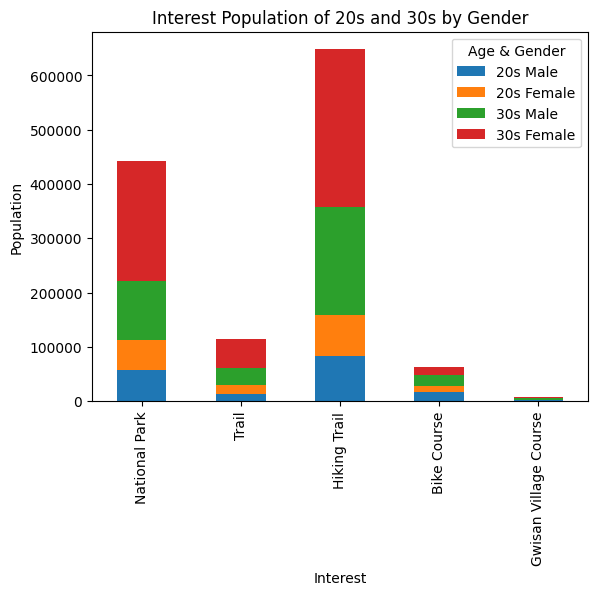

In [91]:
# Graph settings
plt.figure(figsize=(10, 6))

# Draw graph
df.plot(kind='bar', x='Interest', y=['20s Male', '20s Female', '30s Male', '30s Female'], stacked=True)
plt.title('Interest Population of 20s and 30s by Gender')
plt.xlabel('Interest')
plt.ylabel('Population')

# Add legend
plt.legend(title='Age & Gender')

# Show graph
plt.show()


In [94]:
# 각 관심사별 20대 전체 합과 평균 계산
total_20s_sum = df['20s'].sum()
total_20s_mean = df['20s'].mean()/22

# 각 관심사별 30대 전체 합과 평균 계산
total_30s_sum = df['30s'].sum()
total_30s_mean = df['30s'].mean()/22

# 각 연령대에서 성별별로 총 합과 평균 계산
total_20s_male_sum = df['20s Male'].sum()
total_20s_male_mean = df['20s Male'].mean()/22

total_20s_female_sum = df['20s Female'].sum()
total_20s_female_mean = df['20s Female'].mean()/22

total_30s_male_sum = df['30s Male'].sum()
total_30s_male_mean = df['30s Male'].mean()/22

total_30s_female_sum = df['30s Female'].sum()
total_30s_female_mean = df['30s Female'].mean()/22


# 결과 출력
print("Total sum of 20s:", total_20s_sum)
print("Mean of 20s:", total_20s_mean)
print("Total sum of 30s:", total_30s_sum)
print("Mean of 30s:", total_30s_mean)


# 결과 출력
print("Total sum of 20s Male:", total_20s_male_sum)
print("Mean of 20s Male:", total_20s_male_mean)
print("Total sum of 20s Female:", total_20s_female_sum)
print("Mean of 20s Female:", total_20s_female_mean)

print("Total sum of 30s Male:", total_30s_male_sum)
print("Mean of 30s Male:", total_30s_male_mean)
print("Total sum of 30s Female:", total_30s_female_sum)
print("Mean of 30s Female:", total_30s_female_mean)



Total sum of 20s: 330290
Mean of 20s: 3002.6363636363635
Total sum of 30s: 945565
Mean of 30s: 8596.045454545454
Total sum of 20s Male: 174103
Mean of 20s Male: 1582.7545454545455
Total sum of 20s Female: 156187
Mean of 20s Female: 1419.8818181818183
Total sum of 30s Male: 364300
Mean of 30s Male: 3311.818181818182
Total sum of 30s Female: 581265
Mean of 30s Female: 5284.227272727273


# 관심사관심분야(포털 검색 분야) 정보

# 포털 검색

In [21]:
import re
pattern = r'.*포털 검색.*'
re.compile(pattern)

re.compile(r'.*포털 검색.*', re.UNICODE)

In [22]:
def is_match(file_name):
    return re.match(pattern, file_name)

portal_files = list(filter(is_match, file_names))

In [23]:
print(portal_files)

['국립공원 관심인구 관심사관심분야(포털 검색 분야) 정보.csv', '귀산촌 관심인구 관심사관심분야(포털 검색 분야) 정보.csv', '둘레길 관심인구 관심사관심분야(포털 검색 분야) 정보.csv', '등산로 관심인구 관심사관심분야(포털 검색 분야) 정보.csv', '자전거코스자전거길 관심인구 관심사관심분야(포털 검색 분야) 정보.csv']


In [24]:
import pandas as pd

def print_csv_file_info(file_name):
    file_df = pd.read_csv(f'./data/{file_name}', encoding='cp949')
    print(file_df.info())

for i in portal_files:
    print_csv_file_info(i)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625562 entries, 0 to 625561
Data columns (total 26 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   auser_ntrs_id              625562 non-null  object
 1   info_obtn_dt               625562 non-null  object
 2   auser_sxdst_cd             625562 non-null  object
 3   age_group_cd               625562 non-null  int64 
 4   occpn_nm                   624774 non-null  object
 5   hshld_incm_group_nm        624774 non-null  object
 6   mrrg_yn_nm                 625562 non-null  object
 7   chdrn_yn_nm                625562 non-null  object
 8   rsid_fom_nm                624774 non-null  object
 9   auser_ara_ctprv_nm         625562 non-null  object
 10  auser_ara_gu_nm            625562 non-null  object
 11  auser_ara_dong_nm          625562 non-null  object
 12  car_group_nm               387243 non-null  object
 13  craln_tlphn_mkr_nm         624475 non-null  

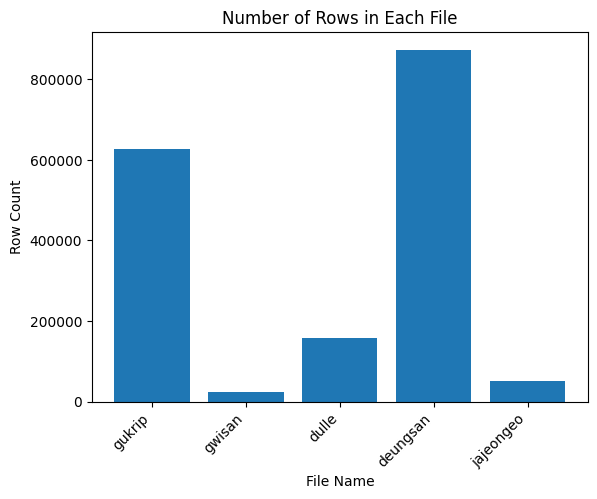

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

sort_index = ['gukrip', 'gwisan', 'dulle', 'deungsan', 'jajeongeo']
file_paths = ['./data/' + file_name for file_name in portal_files]
row_counts = []

for file_path in file_paths:
    try:
        df = pd.read_csv(file_path, encoding='cp949')
        row_counts.append(len(df))
    except pd.errors.EmptyDataError:
        row_counts.append(0)

data = {'File': sort_index, 'Row Count': row_counts}
row_count_df = pd.DataFrame(data)

plt.bar(row_count_df['File'], row_count_df['Row Count'])
plt.xlabel('File Name')
plt.ylabel('Row Count')
plt.title('Number of Rows in Each File')
plt.xticks(rotation=45, ha='right')
plt.show()



In [29]:
print(row_count_df)
sum =0
for i in data['Row Count']:
    sum+=i
print(sum)

        File  Row Count
0     gukrip     625562
1     gwisan      23941
2      dulle     156516
3   deungsan     873021
4  jajeongeo      50937
1729977


In [32]:
df = pd.DataFrame()
sort_index = ['gukrip', 'gwisan', 'dulle', 'deungsan', 'jajeongeo']
counts = []

for idx, file_name in enumerate(portal_files):
    print(file_name)
    file_path = './data/' + file_name
    file_df = pd.read_csv(file_path, encoding='cp949')
    file_df['type'] = sort_index[idx]
    
    counts.append(len(file_df[file_df['age_group_cd'] == 2]))
    df = pd.concat([df, file_df[file_df['age_group_cd'] == 2]])

df.head()

국립공원 관심인구 관심사관심분야(포털 검색 분야) 정보.csv
귀산촌 관심인구 관심사관심분야(포털 검색 분야) 정보.csv
둘레길 관심인구 관심사관심분야(포털 검색 분야) 정보.csv
등산로 관심인구 관심사관심분야(포털 검색 분야) 정보.csv
자전거코스자전거길 관심인구 관심사관심분야(포털 검색 분야) 정보.csv


,auser_ntrs_id,info_obtn_dt,auser_sxdst_cd,age_group_cd,occpn_nm,hshld_incm_group_nm,mrrg_yn_nm,chdrn_yn_nm,rsid_fom_nm,auser_ara_ctprv_nm,...,lilhd_dgnt_cont,wrld_dgnt_cont,it_dgnt_cont,sprt_dgnt_cont,tv_etmn_dgnt_cont,main_ntrs_cd,info_obtn_site_url,info_obtn_site_subjc_nm,type,auser_occpn_nm
80,C***,201903**,M,2,"학생 (초중고학생, 대학생, 대학원생)",800~899만원,아니오,,아파트/ 주상복합,경기,...,NaN,NaN,NaN,스포츠,NaN,스포츠,https://m.sports.naver.com/wbaseball/news/read...,하퍼 13년 3억3천만$ 필라델피아행…ML 역사 최대 계약 :: 네이버스포츠,gukrip,NaN
81,C***,201903**,M,2,"학생 (초중고학생, 대학생, 대학원생)",800~899만원,아니오,,아파트/ 주상복합,경기,...,NaN,NaN,NaN,스포츠,NaN,스포츠,https://m.sports.naver.com/basketball/index.nhn,농구 : 네이버 스포츠,gukrip,NaN
82,C***,201903**,M,2,"학생 (초중고학생, 대학생, 대학원생)",800~899만원,아니오,,아파트/ 주상복합,경기,...,NaN,NaN,NaN,스포츠,NaN,스포츠,https://m.sports.naver.com/basketball/news/rea...,수비 지적 받는 르브론 상관없다 내 동기부여는 비판 아닌 승리 :: 네이버스포츠,gukrip,NaN
83,C***,201903**,M,2,"학생 (초중고학생, 대학생, 대학원생)",800~899만원,아니오,,아파트/ 주상복합,경기,...,NaN,NaN,NaN,스포츠,NaN,스포츠,https://m.sports.naver.com/wfootball/index.nhn,해외축구 : 네이버 스포츠,gukrip,NaN
84,C***,201903**,M,2,"학생 (초중고학생, 대학생, 대학원생)",800~899만원,아니오,,아파트/ 주상복합,경기,...,NaN,NaN,NaN,스포츠,NaN,스포츠,https://m.sports.naver.com/wfootball/news/read...,포체티노의 실언 英레전드 내가 케인-알리라면 토트넘 떠난다 :: 네이버스포츠,gukrip,NaN


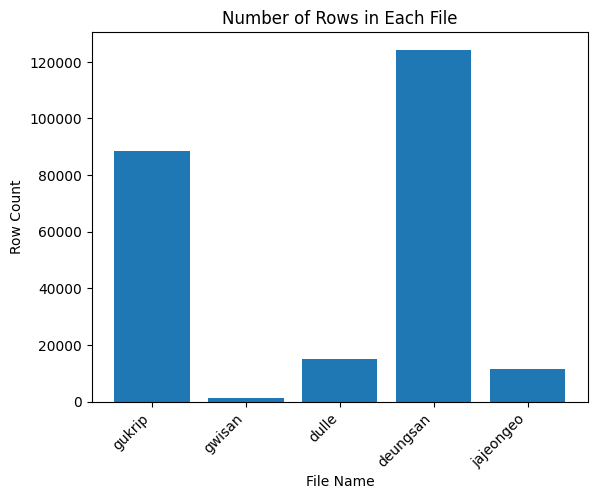

In [33]:
data = {'File': sort_index, 'Count': counts}
count_df = pd.DataFrame(data)

plt.bar(count_df['File'], count_df['Count'])
plt.xlabel('File Name')
plt.ylabel('Row Count')
plt.title('Number of Rows in Each File')
plt.xticks(rotation=45, ha='right')
plt.show()

In [35]:
df = pd.DataFrame()
sort_index = ['gukrip_F', 'gukrip_M', 'gwisan_F', 'gwisan_M', 'dulle_F', 'dulle_M', 'deungsan_F', 'deungsan_M', 'jajeongeo_F', 'jajeongeo']
counts = []

for idx, file_name in enumerate(portal_files):
    print(file_name)
    file_path = './data/' + file_name
    file_df = pd.read_csv(file_path, encoding='cp949')
    file_df['type'] = sort_index[idx]

    twenty_df = file_df[file_df['age_group_cd'] == 2]
    counts.append(len(twenty_df[twenty_df['auser_sxdst_cd'] == 'F']))
    counts.append(len(twenty_df[twenty_df['auser_sxdst_cd'] == 'M']))

df.head()

국립공원 관심인구 관심사관심분야(포털 검색 분야) 정보.csv
귀산촌 관심인구 관심사관심분야(포털 검색 분야) 정보.csv
둘레길 관심인구 관심사관심분야(포털 검색 분야) 정보.csv
등산로 관심인구 관심사관심분야(포털 검색 분야) 정보.csv
자전거코스자전거길 관심인구 관심사관심분야(포털 검색 분야) 정보.csv


""


In [40]:
print(counts)

[33100, 55394, 327, 985, 6676, 8207, 46635, 77648, 4478, 6994]


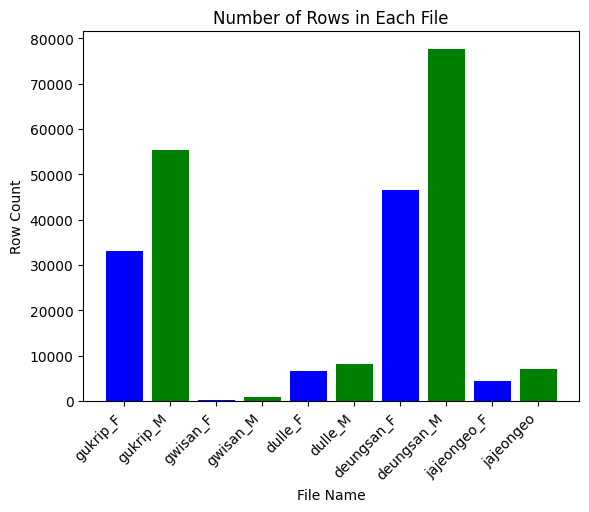

In [36]:
data = {'File': sort_index, 'Count': counts}
count_df = pd.DataFrame(data)
colors = ['blue', 'green', 'blue', 'green', 'blue', 'green', 'blue', 'green']

plt.bar(count_df['File'], count_df['Count'], color=colors)
plt.xlabel('File Name')
plt.ylabel('Row Count')
plt.title('Number of Rows in Each File')
plt.xticks(rotation=45, ha='right')
plt.show()

# 라이프스타일(온라인쇼핑몰 이용 카테고리 정보)

In [23]:
import re
pattern = r'.*라이프.*'
re.compile(pattern)

re.compile(r'.*라이프.*', re.UNICODE)

In [24]:
def is_match(file_name):
    return re.match(pattern, file_name)

portal_files = list(filter(is_match, file_names))
print(portal_files)

['국립공원 관심인구 라이프스타일(온라인쇼핑몰 이용 카테고리 정보).csv', '귀산촌 관심인구 라이프스타일(온라인쇼핑몰 검색구매 카테고리) 정보.csv', '둘레길 관심인구 라이프스타일(온라인쇼핑몰 이용 카테고리 정보).csv', '등산로 관심인구 라이프스타일(온라인쇼핑몰 이용 카테고리 정보).csv', '자전거코스자전거길 관심인구 라이프스타일(온라인쇼핑몰 검색구매 카테고리) 정보.csv']


In [25]:
import pandas as pd

def print_csv_file_info(file_name):
    file_df = pd.read_csv(f'./data/{file_name}', encoding='cp949')
    print(file_df.info())

for i in portal_files:
    print_csv_file_info(i)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173928 entries, 0 to 173927
Data columns (total 27 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   auser_lfst_id              173928 non-null  object
 1   info_obtn_dt               173928 non-null  object
 2   auser_sxdst_cd             173928 non-null  object
 3   age_group_cd               173928 non-null  int64 
 4   occpn_nm                   173621 non-null  object
 5   hshld_incm_group_nm        173621 non-null  object
 6   mrrg_yn_nm                 173928 non-null  object
 7   chdrn_yn_nm                173928 non-null  object
 8   rsid_fom_nm                173621 non-null  object
 9   auser_ara_ctprv_nm         173928 non-null  object
 10  auser_ara_gu_nm            173928 non-null  object
 11  auser_ara_dong_nm          173928 non-null  object
 12  car_group_nm               100721 non-null  object
 13  craln_tlphn_mkr_nm         173534 non-null  

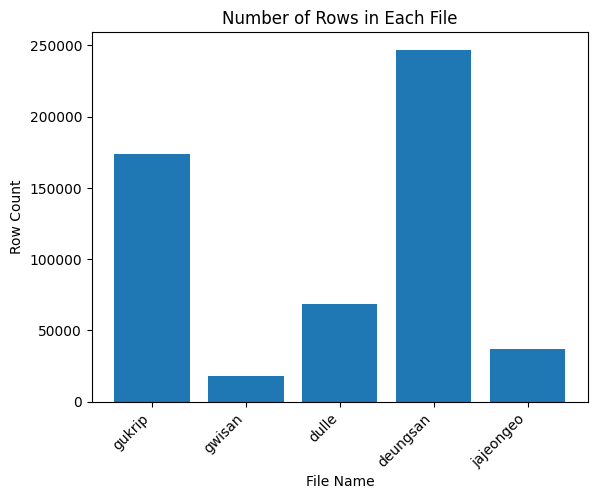

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

sort_index = ['gukrip', 'gwisan', 'dulle', 'deungsan', 'jajeongeo']
file_paths = ['./data/' + file_name for file_name in portal_files]
row_counts = []

for file_path in file_paths:
    try:
        df = pd.read_csv(file_path, encoding='cp949')
        row_counts.append(len(df))
    except pd.errors.EmptyDataError:
        row_counts.append(0)

data = {'File': sort_index, 'Row Count': row_counts}
row_count_df = pd.DataFrame(data)

plt.bar(row_count_df['File'], row_count_df['Row Count'])
plt.xlabel('File Name')
plt.ylabel('Row Count')
plt.title('Number of Rows in Each File')
plt.xticks(rotation=45, ha='right')
plt.show()

In [27]:
print(row_count_df)
sum =0
for i in data['Row Count']:
    sum+=i
print("sum", sum)

        File  Row Count
0     gukrip     173928
1     gwisan      18211
2      dulle      68606
3   deungsan     247034
4  jajeongeo      36729
sum 544508


In [16]:
df = pd.DataFrame()
sort_index = ['gukrip', 'gwisan', 'dulle', 'deungsan', 'jajeongeo']
counts = []

for idx, file_name in enumerate(portal_files):
    print(file_name)
    file_path = '../data/' + file_name
    file_df = pd.read_csv(file_path, encoding='cp949')
    file_df['type'] = sort_index[idx]
    
    counts.append(len(file_df[file_df['age_group_cd'] == 2]))
    df = pd.concat([df, file_df[file_df['age_group_cd'] == 2]])

df.head()

국립공원 관심인구 라이프스타일(온라인쇼핑몰 이용 카테고리 정보).csv
귀산촌 관심인구 라이프스타일(온라인쇼핑몰 검색구매 카테고리) 정보.csv
둘레길 관심인구 라이프스타일(온라인쇼핑몰 이용 카테고리 정보).csv
등산로 관심인구 라이프스타일(온라인쇼핑몰 이용 카테고리 정보).csv
자전거코스자전거길 관심인구 라이프스타일(온라인쇼핑몰 검색구매 카테고리) 정보.csv


,auser_lfst_id,info_obtn_dt,auser_sxdst_cd,age_group_cd,occpn_nm,hshld_incm_group_nm,mrrg_yn_nm,chdrn_yn_nm,rsid_fom_nm,auser_ara_ctprv_nm,...,sprt_fshn_prfn_cont,grcs_helth_prfn_cont,jrny_prfn_cont,fshn_wear_prfn_cont,auser_fshn_stff_prfn_cont,lfst_cd,info_obtn_site_url,type,auser_occpn_nm,fshn_stff_prfn_cont
2,C***,201903**,F,2,"사무직 (일반사무직, 공무원, 직업군인)",400~499만원,아니오,,아파트/ 주상복합,부산,...,NaN,NaN,NaN,패션의류,NaN,패션잡화,http://m.11st.co.kr/MW/api/app/elevenst/produc...,gukrip,NaN,NaN
3,C***,201903**,F,2,"사무직 (일반사무직, 공무원, 직업군인)",400~499만원,아니오,,아파트/ 주상복합,부산,...,NaN,NaN,NaN,패션의류,NaN,패션잡화,http://m.11st.co.kr/MW/api/app/elevenst/produc...,gukrip,NaN,NaN
5,C***,201903**,F,2,"사무직 (일반사무직, 공무원, 직업군인)",400~499만원,아니오,,아파트/ 주상복합,부산,...,NaN,NaN,NaN,패션의류,NaN,패션잡화,http://m.11st.co.kr/MW/api/app/elevenst/produc...,gukrip,NaN,NaN
8,C***,201903**,F,2,"사무직 (일반사무직, 공무원, 직업군인)",400~499만원,아니오,,아파트/ 주상복합,부산,...,NaN,NaN,NaN,NaN,NaN,패션잡화,http://m.11st.co.kr/MW/api/app/elevenst/produc...,gukrip,NaN,NaN
11,C***,201903**,F,2,"생산/노무직 (생산감독, 경비원, 공장근로자)",100~199만원,아니오,,기타,인천,...,NaN,NaN,NaN,NaN,NaN,패션잡화,http://capi.coupang.com/v3/search-filter?filte...,gukrip,NaN,NaN


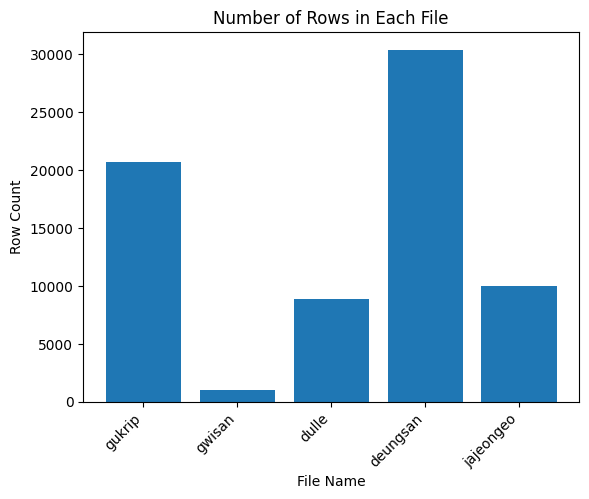

In [17]:
data = {'File': sort_index, 'Count': counts}
count_df = pd.DataFrame(data)

plt.bar(count_df['File'], count_df['Count'])
plt.xlabel('File Name')
plt.ylabel('Row Count')
plt.title('Number of Rows in Each File')
plt.xticks(rotation=45, ha='right')
plt.show()

In [18]:
df = pd.DataFrame()
sort_index = ['gukrip_F', 'gukrip_M', 'gwisan_F', 'gwisan_M', 'dulle_F', 'dulle_M', 'deungsan_F', 'deungsan_M', 'jajeongeo_F', 'jajeongeo']
counts = []

for idx, file_name in enumerate(portal_files):
    print(file_name)
    file_path = '../data/' + file_name
    file_df = pd.read_csv(file_path, encoding='cp949')
    file_df['type'] = sort_index[idx]

    twenty_df = file_df[file_df['age_group_cd'] == 2]
    counts.append(len(twenty_df[twenty_df['auser_sxdst_cd'] == 'F']))
    counts.append(len(twenty_df[twenty_df['auser_sxdst_cd'] == 'M']))

df.head()

국립공원 관심인구 라이프스타일(온라인쇼핑몰 이용 카테고리 정보).csv
귀산촌 관심인구 라이프스타일(온라인쇼핑몰 검색구매 카테고리) 정보.csv
둘레길 관심인구 라이프스타일(온라인쇼핑몰 이용 카테고리 정보).csv
등산로 관심인구 라이프스타일(온라인쇼핑몰 이용 카테고리 정보).csv
자전거코스자전거길 관심인구 라이프스타일(온라인쇼핑몰 검색구매 카테고리) 정보.csv


""


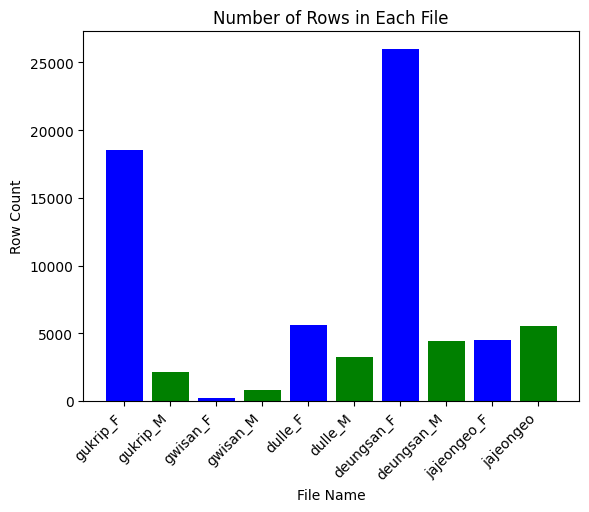

In [19]:
data = {'File': sort_index, 'Count': counts}
count_df = pd.DataFrame(data)
colors = ['blue', 'green', 'blue', 'green', 'blue', 'green', 'blue', 'green']

plt.bar(count_df['File'], count_df['Count'], color=colors)
plt.xlabel('File Name')
plt.ylabel('Row Count')
plt.title('Number of Rows in Each File')
plt.xticks(rotation=45, ha='right')
plt.show()

# 관심인구 정보

In [34]:
import re
pattern = r'.*관심인구 정보.*'
re.compile(pattern)

re.compile(r'.*관심인구 정보.*', re.UNICODE)

In [40]:
def is_match(file_name):
    return re.match(pattern, file_name)

portal_files = list(filter(is_match, file_names))
print(portal_files)

['국립공원 관심인구 정보.csv', '귀산촌 관심인구 정보.csv', '둘레길 관심인구 정보.csv', '등산로 관심인구 정보.csv', '자전거코스자전거길 관심인구 정보.csv']


In [41]:
import pandas as pd

def print_csv_file_info(file_name):
    file_df = pd.read_csv(f'./data/{file_name}', encoding='cp949')
    print(file_df.info())

for i in portal_files:
    print_csv_file_info(i)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19910 entries, 0 to 19909
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   auser_info_id              19910 non-null  object
 1   extrc_word_nm              19910 non-null  object
 2   info_obtn_dt               19910 non-null  object
 3   auser_sxdst_cd             19910 non-null  object
 4   age_group_cd               19910 non-null  int64 
 5   occpn_nm                   19893 non-null  object
 6   hshld_incm_group_nm        19893 non-null  object
 7   mrrg_yn_nm                 19910 non-null  object
 8   chdrn_yn_nm                19910 non-null  object
 9   rsid_fom_nm                19893 non-null  object
 10  auser_ara_ctprv_nm         19910 non-null  object
 11  auser_ara_gu_nm            19910 non-null  object
 12  auser_ara_dong_nm          19910 non-null  object
 13  car_group_nm               12439 non-null  object
 14  craln_

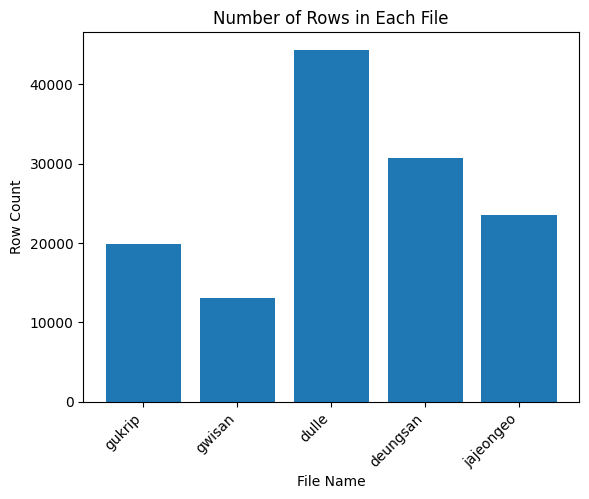

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

sort_index = ['gukrip', 'gwisan', 'dulle', 'deungsan', 'jajeongeo']
file_paths = ['./data/' + file_name for file_name in portal_files]
row_counts = []

for file_path in file_paths:
    try:
        df = pd.read_csv(file_path, encoding='cp949')
        row_counts.append(len(df))
    except pd.errors.EmptyDataError:
        row_counts.append(0)

data = {'File': sort_index, 'Row Count': row_counts}
row_count_df = pd.DataFrame(data)

plt.bar(row_count_df['File'], row_count_df['Row Count'])
plt.xlabel('File Name')
plt.ylabel('Row Count')
plt.title('Number of Rows in Each File')
plt.xticks(rotation=45, ha='right')
plt.show()

In [43]:
print(row_count_df)
sum =0
for i in data['Row Count']:
    sum+=i
print("sum", sum)

        File  Row Count
0     gukrip      19910
1     gwisan      13011
2      dulle      44373
3   deungsan      30692
4  jajeongeo      23494
sum 131480


In [24]:
df = pd.DataFrame()
sort_index = ['gukrip', 'gwisan', 'dulle', 'deungsan', 'jajeongeo']
counts = []

for idx, file_name in enumerate(portal_files):
    print(file_name)
    file_path = '../data/' + file_name
    file_df = pd.read_csv(file_path, encoding='cp949')
    file_df['type'] = sort_index[idx]
    
    counts.append(len(file_df[file_df['age_group_cd'] == 2]))
    df = pd.concat([df, file_df[file_df['age_group_cd'] == 2]])

df.head()

국립공원 관심인구 정보.csv
귀산촌 관심인구 정보.csv
둘레길 관심인구 정보.csv
등산로 관심인구 정보.csv
자전거코스자전거길 관심인구 정보.csv


,auser_info_id,extrc_word_nm,info_obtn_dt,auser_sxdst_cd,age_group_cd,occpn_nm,hshld_incm_group_nm,mrrg_yn_nm,chdrn_yn_nm,rsid_fom_nm,auser_ara_ctprv_nm,auser_ara_gu_nm,auser_ara_dong_nm,car_group_nm,craln_tlphn_mkr_nm,craln_tlphn_sbscr_cmpn_nm,info_obtn_site_url,info_obtn_site_subjc_nm,type,auser_occpn_nm
55,C***,북한산,201903**,M,2,"학생 (초중고학생, 대학생, 대학원생)",600~699만원,아니오,,아파트/ 주상복합,서울,노원구,상계2동,NaN,삼성,SKT,https://m.news.naver.com/read.nhn?mode=LSD&sid...,서울 은평구 모델하우스 화재…북한산으로 옮겨붙어(종합),gukrip,NaN
56,C***,북한산,201903**,M,2,"학생 (초중고학생, 대학생, 대학원생)",600~699만원,아니오,,아파트/ 주상복합,서울,노원구,상계2동,NaN,삼성,SKT,https://m.news.naver.com/read.nhn?mode=LSD&sid...,서울 은평구 모델하우스 화재…북한산으로 옮겨붙어(종합),gukrip,NaN
92,C***1,내장사,201903**,M,2,무직,300~399만원,아니오,,단독주택,대전,동구,가오동,NaN,삼성,KT,https://auto.v.daum.net/v/aT7YKg5jYH?f=m,신형 쏘나타 추가 디자인과 내장 사양 공개 | Daum 자동차,gukrip,NaN
109,C***,경주,201903**,F,2,"전문직 (의사, 판검사, 예술가, 종교인)",700~799만원,아니오,,단독주택,울산,남구,신정1동,"소형SUV/CUV (티볼리, QM3 등)",애플,LG U+,https://m.search.naver.com/search.naver?query=...,경주 회전초밥 : 네이버 통합검색,gukrip,NaN
112,C***,경주,201903**,F,2,"생산/노무직 (생산감독, 경비원, 공장근로자)",100~199만원,아니오,,기타,인천,연수구,연수동,NaN,삼성,LG U+,https://m.blog.naver.com/snaya5527/221381270629,경주여행 전야제?_?심술712 파는곳 / 화요토닉 맛있게 먹는법!!!+다이소 술잔 ...,gukrip,NaN


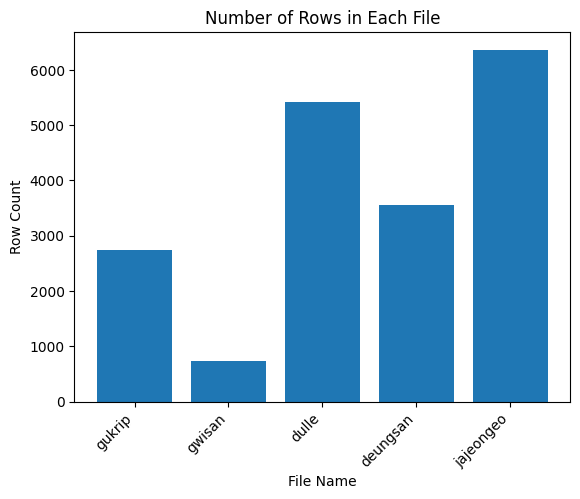

In [25]:
data = {'File': sort_index, 'Count': counts}
count_df = pd.DataFrame(data)

plt.bar(count_df['File'], count_df['Count'])
plt.xlabel('File Name')
plt.ylabel('Row Count')
plt.title('Number of Rows in Each File')
plt.xticks(rotation=45, ha='right')
plt.show()

In [28]:
df = pd.DataFrame()
sort_index = ['gukrip_F', 'gukrip_M', 'gwisan_F', 'gwisan_M', 'dulle_F', 'dulle_M', 'deungsan_F', 'deungsan_M', 'jajeongeo_F', 'jajeongeo_M']
counts = []

for idx, file_name in enumerate(portal_files):
    print(file_name)
    file_path = '../data/' + file_name
    file_df = pd.read_csv(file_path, encoding='cp949')
    file_df['type'] = sort_index[idx]

    twenty_df = file_df[file_df['age_group_cd'] == 2]
    counts.append(len(twenty_df[twenty_df['auser_sxdst_cd'] == 'F']))
    counts.append(len(twenty_df[twenty_df['auser_sxdst_cd'] == 'M']))

df.head()

국립공원 관심인구 정보.csv
귀산촌 관심인구 정보.csv
둘레길 관심인구 정보.csv
등산로 관심인구 정보.csv
자전거코스자전거길 관심인구 정보.csv


""


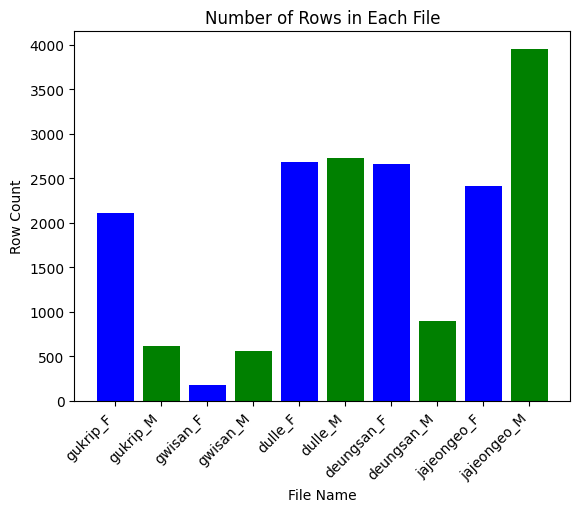

In [29]:
data = {'File': sort_index, 'Count': counts}
count_df = pd.DataFrame(data)
colors = ['blue', 'green', 'blue', 'green', 'blue', 'green', 'blue', 'green']

plt.bar(count_df['File'], count_df['Count'], color=colors)
plt.xlabel('File Name')
plt.ylabel('Row Count')
plt.title('Number of Rows in Each File')
plt.xticks(rotation=45, ha='right')
plt.show()